# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Alvin Fajar Permana
- **Email:** alvin.fajar.2105356@students.um.ac.id
- **ID Dicoding:** alvinfp

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1. What are the top 10 product categories with the highest and lowest total sales?
- Pertanyaan 2. What are the total orders per month for the years 2017 and 2018?
- Pertanyaan 3. How many customers and sellers are there by city?
- Pertanyaan 4. What are the most frequent review comment titles?
- Pertanyaan 5. How are customers categorized by geographic location?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import urllib.request

D:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Data Wrangling

### Gathering Data

In [16]:
customer = pd.read_csv("Data/customers_dataset.csv")
geolocation = pd.read_csv("Data/geolocation_dataset.csv")
order_items = pd.read_csv("Data/order_items_dataset.csv")
order_payments = pd.read_csv("Data/order_payments_dataset.csv")
order_reviews = pd.read_csv("Data/order_reviews_data.csv")
orders = pd.read_csv("Data/orders_dataset.csv")
product_category = pd.read_csv("Data/product_category_name_translation.csv")
products = pd.read_csv("Data/products_dataset.csv")
sellers = pd.read_csv("Data/sellers_dataset.csv")




In [17]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [19]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data
#### Check all data info

In [27]:
data = {
    'customer': customer,
    'geolocation': geolocation,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'orders': orders,
    'product_category': product_category,
    'products': products,
    'sellers': sellers
}
for tabel, df in data.items():
    print('\n',tabel)
    print(df.info())


 customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

 geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city 

#### check missing values

In [28]:
for tabel, df in data.items():
    print(f'\nData: {tabel}')
    print(df.isna().sum())


Data: customer
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data: geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data: order_payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data: order_reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0


#### Check duplicated data

In [29]:
for tabel, df in data.items():
    print(f'\nData: {tabel}')
    print(df.duplicated().sum())


Data: customer
0

Data: geolocation
261831

Data: order_items
0

Data: order_payments
0

Data: order_reviews
0

Data: orders
0

Data: product_category
0

Data: products
0

Data: sellers
0


### Cleaning Data

In [30]:
for tabel, df in data.items():
    df.dropna(axis=0, inplace=True)

In [31]:
for tabel, df in data.items():
    print(f'\nData: {tabel}')
    print(df.isna().sum())


Data: customer
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data: geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data: order_payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data: order_reviews
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Data: orders
o

## Exploratory Data Analysis (EDA)

### Customer exploratory

In [33]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [35]:
customer.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [36]:
customer.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [37]:
customer.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Geolocation Exploratory

In [39]:
print(geolocation.describe(include="all"))
print(geolocation['geolocation_city'].value_counts())
print(geolocation['geolocation_state'].value_counts())


        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011            

In [78]:
# merge customer and geolocation
customer_location = customer.merge(geolocation, 
                                       how='left', 
                                       left_on='customer_zip_code_prefix', 
                                       right_on='geolocation_zip_code_prefix')

customer_location = customer_location[['customer_unique_id','customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

print(customer_location.head())


                 customer_unique_id  customer_zip_code_prefix  \
0  861eff4711a542e4b93843c6dd7febb0                     14409   
1  861eff4711a542e4b93843c6dd7febb0                     14409   
2  861eff4711a542e4b93843c6dd7febb0                     14409   
3  861eff4711a542e4b93843c6dd7febb0                     14409   
4  861eff4711a542e4b93843c6dd7febb0                     14409   

   geolocation_lat  geolocation_lng  
0       -20.509897       -47.397866  
1       -20.497396       -47.399241  
2       -20.510459       -47.399553  
3       -20.480940       -47.394161  
4       -20.515413       -47.398194  


In [79]:
# drop duplicated
customer_location = customer_location.drop_duplicates(subset=['customer_unique_id'])
print(customer_location)

                        customer_unique_id  customer_zip_code_prefix  \
0         861eff4711a542e4b93843c6dd7febb0                     14409   
147       290c77bc529b7ac935b93aa66c333dc3                      9790   
325       060e732b5b29e8181a18229c7b0b2b5e                      1151   
428       259dac757896d24d7702b9acbbff3f3c                      8775   
561       345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                    ...                       ...   
15083045  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
15083094  d52a67c98be1cf6a5c84435bd38d095d                      6764   
15083305  e9f50caf99f032f0bf3c55141f019d99                     60115   
15083462  73c2643a0a458b49f58cea58833b192e                     92120   
15083599  84732c5050c01db9b23e19ba39899398                      6703   

          geolocation_lat  geolocation_lng  
0              -20.509897       -47.397866  
147            -23.726853       -46.545746  


### order_items and product exploratory

In [40]:
merged_product = pd.merge(order_items, products, on='product_id', how='inner')
highest_price_product = merged_product.nlargest(1, 'price')[['product_id','product_category_name', 'price']]
print("highest price:")
print(highest_price_product)
print('\n' "all product price")
sorted_products = merged_product.sort_values(by='price', ascending=False)
print(sorted_products[[ 'product_category_name', 'price']])

highest price:
                            product_id  product_category_name   price
3512  489ae2aa008f021502940f251d4cce7f  utilidades_domesticas  6735.0

all product price
                    product_category_name    price
3512                utilidades_domesticas  6735.00
110635                                pcs  6729.00
106301                              artes  6499.00
73293                     eletroportateis  4799.00
11083                     eletroportateis  4690.00
...                                   ...      ...
56499                        beleza_saude     1.20
56489                        beleza_saude     1.20
27251   construcao_ferramentas_construcao     0.85
47936   construcao_ferramentas_construcao     0.85
85855   construcao_ferramentas_construcao     0.85

[111046 rows x 2 columns]


### product_category exploratory

In [41]:
merged_product_with_category = pd.merge(merged_product, product_category, on='product_category_name', how='left')
highest_price_product = merged_product_with_category.nlargest(1, 'price')[['product_id','product_category_name', 'product_category_name_english', 'price']]
print("highest price:")
print(highest_price_product)
print('\n' "all product price")
sorted_products = merged_product_with_category.sort_values(by='price', ascending=False)
print(sorted_products[[ 'product_category_name', 'product_category_name_english', 'price']])

highest price:
                            product_id  product_category_name  \
3512  489ae2aa008f021502940f251d4cce7f  utilidades_domesticas   

     product_category_name_english   price  
3512                    housewares  6735.0  

all product price
                    product_category_name    product_category_name_english  \
3512                utilidades_domesticas                       housewares   
110635                                pcs                        computers   
106301                              artes                              art   
73293                     eletroportateis                 small_appliances   
11083                     eletroportateis                 small_appliances   
...                                   ...                              ...   
56499                        beleza_saude                    health_beauty   
56489                        beleza_saude                    health_beauty   
27251   construcao_ferramentas_construcao  

### order_payments exploratory

In [42]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
payment = order_payments.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
payment_sorted = payment.sort_values(by='payment_value', ascending=False)
print(payment_sorted)


              order_id  payment_value
payment_type                         
credit_card      76505    12542084.19
boleto           19784     2869361.27
voucher           3866      379436.87
debit_card        1528      217989.79
not_defined          3           0.00


### order_reviews exploratory

In [45]:
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,9839,9839,9839.000000,9839,9839,9839,9839
unique,9798,9830,NaN,4123,9024,169,9790
top,08528f70f579f0c830189efc523d2182,2daee070f2042c8b7a8e9fdde778a31a,NaN,Recomendo,Muito bom,2018-05-19 00:00:00,2018-08-06 00:09:52
freq,3,2,NaN,354,63,162,3
mean,NaN,NaN,3.837585,NaN,NaN,NaN,NaN
std,NaN,NaN,1.556435,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [46]:
review_score_counts = order_reviews['review_score'].value_counts().sort_values(ascending=False)

print(review_score_counts)

review_score
5    5422
1    1789
4    1433
3     737
2     458
Name: count, dtype: int64


In [47]:
filtered_reviews = order_reviews[order_reviews['order_id'] == 'b9bf720beb4ab3728760088589c62129']

print(filtered_reviews[['review_score']])


   review_score
9             4


### orders explanatory

In [48]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507


In [49]:
# convert to datetime
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivery_time'] = orders['order_estimated_delivery_date'] - orders['order_delivered_carrier_date']
print(orders[['order_estimated_delivery_date', 'order_delivered_carrier_date', 'order_delivery_time']])

      order_estimated_delivery_date order_delivered_carrier_date  \
0                        2017-10-18          2017-10-04 19:55:00   
1                        2018-08-13          2018-07-26 14:31:00   
2                        2018-09-04          2018-08-08 13:50:00   
3                        2017-12-15          2017-11-22 13:39:59   
4                        2018-02-26          2018-02-14 19:46:34   
...                             ...                          ...   
99436                    2017-03-28          2017-03-10 11:18:03   
99437                    2018-03-02          2018-02-07 23:22:42   
99438                    2017-09-27          2017-08-28 20:52:26   
99439                    2018-02-15          2018-01-12 15:35:03   
99440                    2018-04-03          2018-03-09 22:11:59   

      order_delivery_time  
0        13 days 04:05:00  
1        17 days 09:29:00  
2        26 days 10:10:00  
3        22 days 10:20:01  
4        11 days 04:13:26  
...            

### All data exploratory

In [50]:
# Merge order_items and products
sales_product_df = pd.merge(
    left=order_items,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Merge sales_product_df with orders
sales_orders_df = pd.merge(
    left=sales_product_df,
    right=orders,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Merge sales_orders_df with customers
sales_cust = pd.merge(
    left=sales_orders_df,
    right=customer,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_df = pd.merge(
    left=sales_cust,
    right=product_category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)


all_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,9 days 05:25:44,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,10 days 09:25:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,19 days 11:23:12,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,9 days 10:32:00,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,28 days 14:13:51,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,garden_tools


In [53]:
print(all_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_category_name_english'],
      dtype='object')


In [51]:
result_df = all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_item_id": "sum",  
    "price": "sum"  
})
print(result_df)

                                            order_item_id    price
customer_state product_category_name                              
AC             artigos_de_natal                         1    69.90
               automotivo                               4   540.98
               bebes                                    3   697.84
               beleza_saude                             8  1386.58
               brinquedos                               3   234.79
...                                                   ...      ...
TO             portateis_casa_forno_e_cafe              1  1999.00
               relogios_presentes                      33  4920.89
               telefonia                               22  1268.12
               telefonia_fixa                           2  1390.99
               utilidades_domesticas                   16   926.17

[1362 rows x 2 columns]


In [52]:
order_detail = all_df.groupby(by=["order_status", "product_category_name"]).agg({
    "order_item_id": "sum",  # Menghitung jumlah order_item_id
    "price": "sum",  # Menghitung total harga
    "product_weight_g": "mean", # Menghitung rata-rata berat produk
    "product_length_cm": "mean", # Menghitung rata-rata panjang produk
    "product_height_cm": "mean", # Menghitung rata-rata tinggi produk
    "product_width_cm": "mean" # Menghitung rata-rata lebar produk
})
print(order_detail)

                                          order_item_id      price  \
order_status product_category_name                                   
canceled     beleza_saude                             3      79.89   
             brinquedos                               1      99.99   
             esporte_lazer                            1      21.50   
             fashion_bolsas_e_acessorios              1     135.00   
             perfumaria                               2     309.80   
...                                                 ...        ...   
delivered    sinalizacao_e_seguranca                305   21315.05   
             tablets_impressao_imagem                89    7528.41   
             telefonia                             5031  309762.23   
             telefonia_fixa                         347   55315.21   
             utilidades_domesticas                 8831  615628.69   

                                          product_weight_g  product_length_cm  \
order_st

## Visualization & Explanatory Analysis

- Pertanyaan 1. What are the top 10 product categories with the highest and lowest total sales?

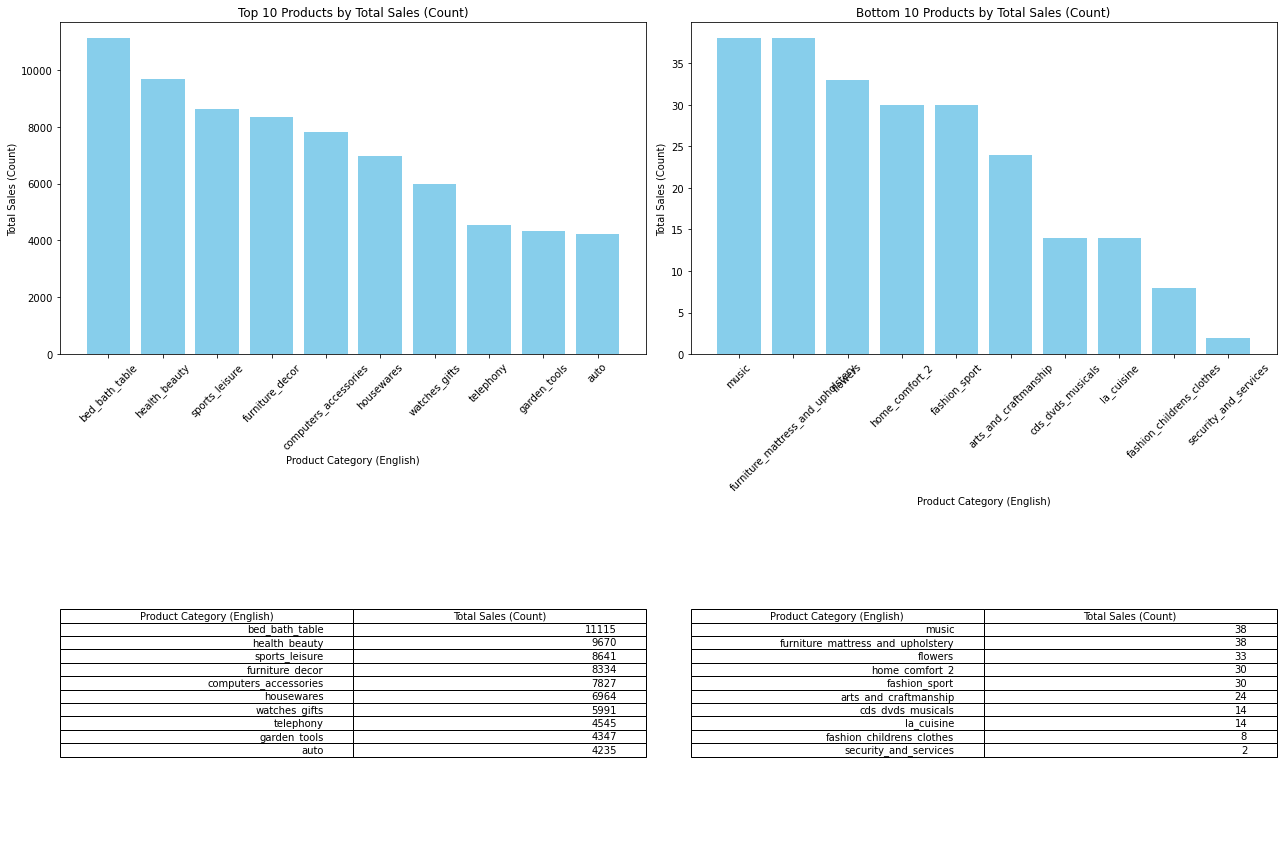

In [66]:
product_counts = all_df['product_category_name_english'].value_counts().sort_values(ascending=False)
top_10_products_count = product_counts.head(10)
bottom_10_products_count = product_counts.tail(10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes[0, 0].bar(top_10_products_count.index, top_10_products_count.values, color='skyblue')
axes[0, 0].set_title('Top 10 Products by Total Sales (Count)')
axes[0, 0].set_xlabel('Product Category (English)')
axes[0, 0].set_ylabel('Total Sales (Count)')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(bottom_10_products_count.index, bottom_10_products_count.values, color='skyblue')
axes[0, 1].set_title('Bottom 10 Products by Total Sales (Count)')
axes[0, 1].set_xlabel('Product Category (English)')
axes[0, 1].set_ylabel('Total Sales (Count)')
axes[0, 1].tick_params(axis='x', rotation=45)

top_10_products_count_df = pd.DataFrame({'Product Category (English)': top_10_products_count.index, 'Total Sales (Count)': top_10_products_count.values})
axes[1, 0].axis('off')
axes[1, 0].table(cellText=top_10_products_count_df.values, colLabels=top_10_products_count_df.columns, loc='center')

bottom_10_products_count_df = pd.DataFrame({'Product Category (English)': bottom_10_products_count.index, 'Total Sales (Count)': bottom_10_products_count.values})
axes[1, 1].axis('off')
axes[1, 1].table(cellText=bottom_10_products_count_df.values, colLabels=bottom_10_products_count_df.columns, loc='center')

plt.tight_layout()
plt.show()

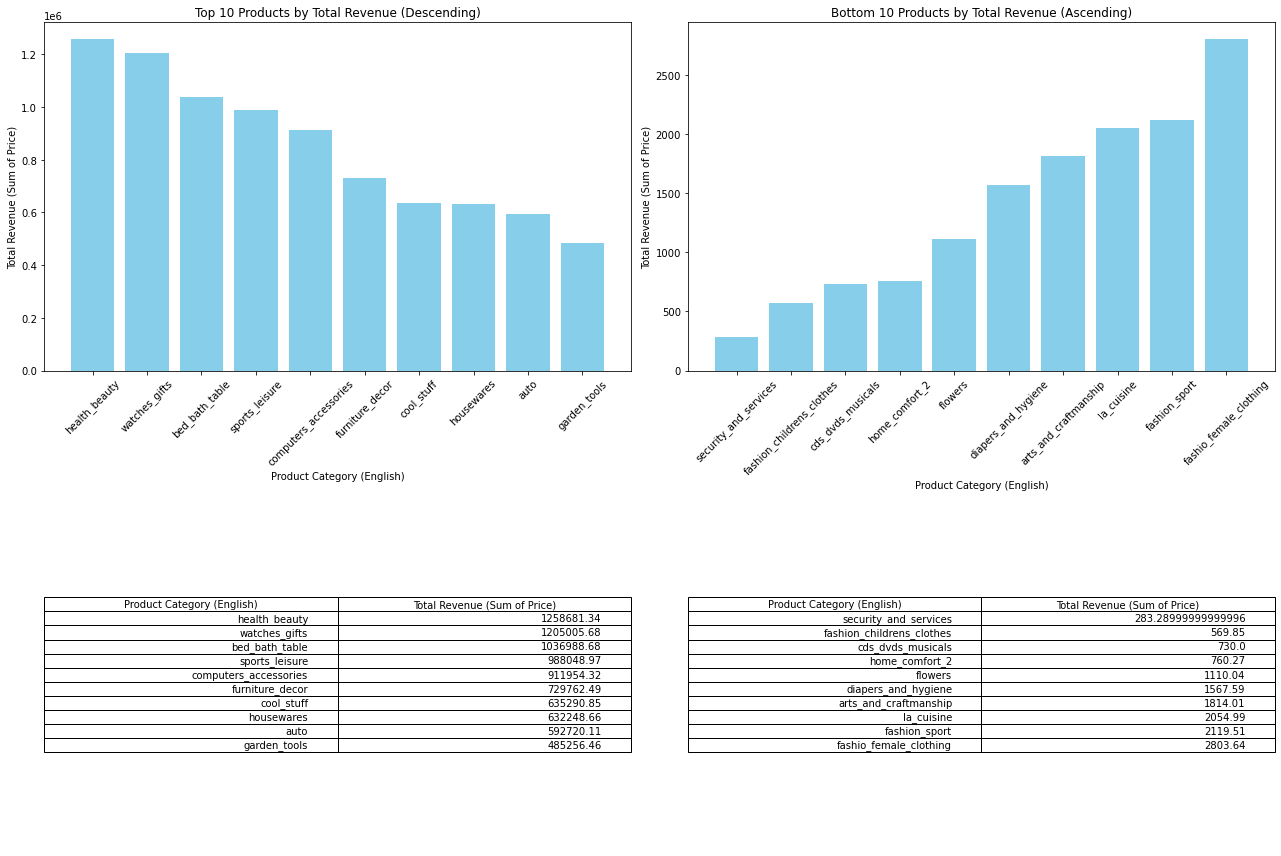

In [71]:
product_revenue = all_df.groupby('product_category_name_english')['price'].sum()

product_revenue_descending = product_revenue.sort_values(ascending=False)
top_10_products_revenue_descending = product_revenue_descending.head(10)

product_revenue_ascending = product_revenue.sort_values(ascending=True)
bottom_10_products_revenue_ascending = product_revenue_ascending.head(10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes[0, 0].bar(top_10_products_revenue_descending.index, top_10_products_revenue_descending.values, color='skyblue')
axes[0, 0].set_title('Top 10 Products by Total Revenue (Descending)')
axes[0, 0].set_xlabel('Product Category (English)')
axes[0, 0].set_ylabel('Total Revenue (Sum of Price)')
axes[0, 0].tick_params(axis='x', rotation=45)

top_10_products_revenue_df_descending = pd.DataFrame({'Product Category (English)': top_10_products_revenue_descending.index, 'Total Revenue (Sum of Price)': top_10_products_revenue_descending.values})
axes[1, 0].axis('off')
axes[1, 0].table(cellText=top_10_products_revenue_df_descending.values, colLabels=top_10_products_revenue_df_descending.columns, loc='center')

axes[0, 1].bar(bottom_10_products_revenue_ascending.index, bottom_10_products_revenue_ascending.values, color='skyblue')
axes[0, 1].set_title('Bottom 10 Products by Total Revenue (Ascending)')
axes[0, 1].set_xlabel('Product Category (English)')
axes[0, 1].set_ylabel('Total Revenue (Sum of Price)')
axes[0, 1].tick_params(axis='x', rotation=45)

bottom_10_products_revenue_df_ascending = pd.DataFrame({'Product Category (English)': bottom_10_products_revenue_ascending.index, 'Total Revenue (Sum of Price)': bottom_10_products_revenue_ascending.values})
axes[1, 1].axis('off')
axes[1, 1].table(cellText=bottom_10_products_revenue_df_ascending.values, colLabels=bottom_10_products_revenue_df_ascending.columns, loc='center')

plt.tight_layout()
plt.show()


- Pertanyaan 2. What are the total orders per month for the years 2017 and 2018?

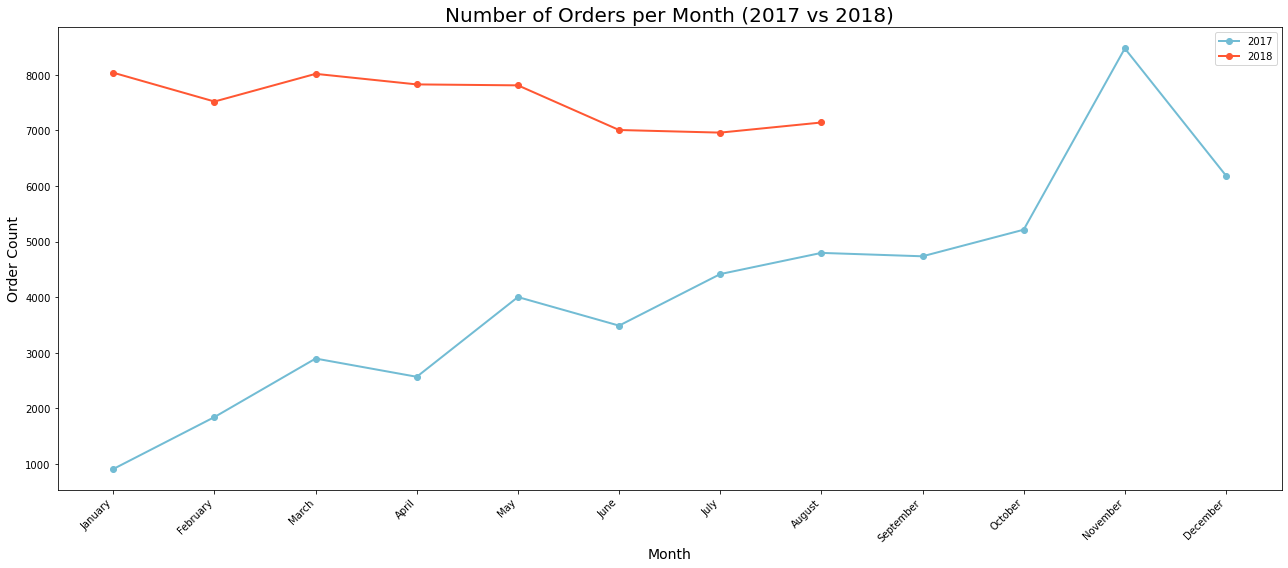

In [73]:
all_df = pd.read_csv("./Data/all_df.csv")
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Filter data for the year 2017
data_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]
order_counts_per_month_2017 = data_2017.resample('ME', on='order_purchase_timestamp')['order_id'].count()
order_counts_per_month_2017.index = order_counts_per_month_2017.index.strftime('%B')

# Filter data for the year 2018
data_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]
order_counts_per_month_2018 = data_2018.resample('ME', on='order_purchase_timestamp')['order_id'].count()
order_counts_per_month_2018.index = order_counts_per_month_2018.index.strftime('%B')

# Convert index and data to lists
months_2017 = list(order_counts_per_month_2017.index)
months_2018 = list(order_counts_per_month_2018.index)
order_counts_array_2017 = order_counts_per_month_2017.values
order_counts_array_2018 = order_counts_per_month_2018.values

# Plot
plt.figure(figsize=(18, 8))

plt.plot(months_2017, order_counts_array_2017, marker='o', linewidth=2, color="#72BCD4", label='2017')
plt.plot(months_2018, order_counts_array_2018, marker='o', linewidth=2, color="#FF5733", label='2018')

plt.title('Number of Orders per Month (2017 vs 2018)', loc="center", fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


- Pertanyaan 3. How many customers and sellers are there by city?

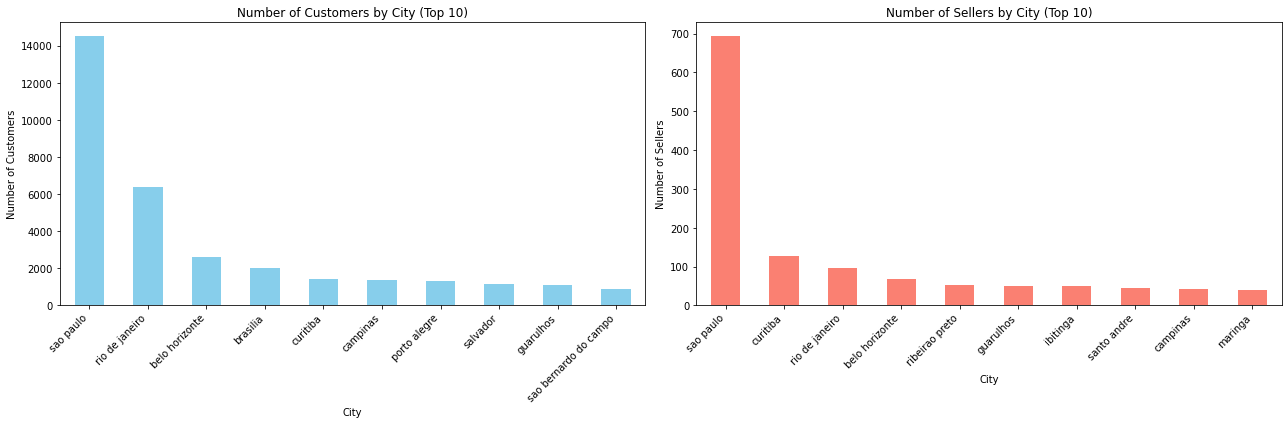

In [74]:
customer_by_city = all_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)
top_10_customer_cities = customer_by_city.head(10)


seller_by_city = sellers.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False)
top_10_seller_cities = seller_by_city.head(10)


plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
top_10_customer_cities.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
top_10_seller_cities.plot(kind='bar', color='salmon')
plt.title('Number of Sellers by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- Pertanyaan 4. What are the most frequent review comment titles?

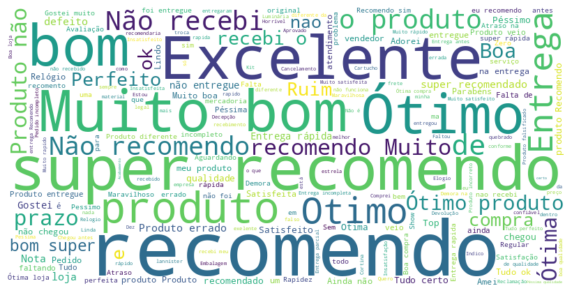

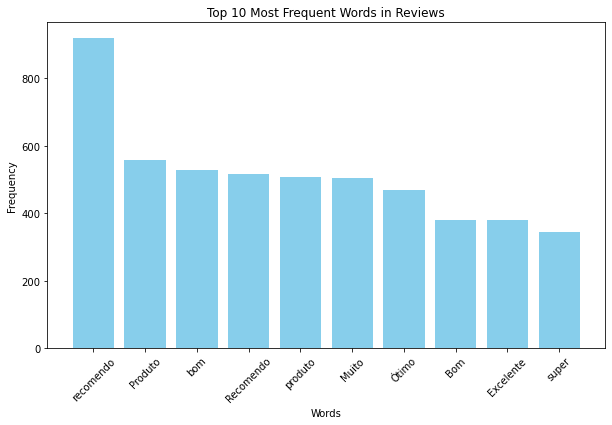

In [75]:
text = ' '.join(order_reviews['review_comment_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word_freq = Counter(text.split())

top_10_words = word_freq.most_common(10)

words, frequencies = zip(*top_10_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Reviews')
plt.xticks(rotation=45)
plt.show()

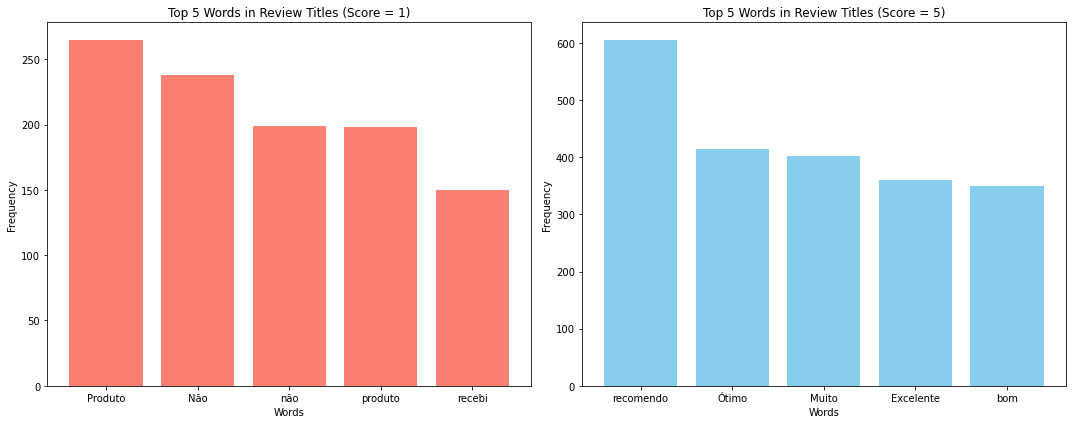

In [76]:
# Most words in score 5 and score 1 
score_1_comments = order_reviews[order_reviews['review_score'] == 1]['review_comment_title']
score_5_comments = order_reviews[order_reviews['review_score'] == 5]['review_comment_title']

def count_words(comments):
    words = ' '.join(comments).split()
    return Counter(words).most_common(5)

top_5_words_score_1 = count_words(score_1_comments)
top_5_words_score_5 = count_words(score_5_comments)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].bar(*zip(*top_5_words_score_1), color='salmon')
axs[0].set_title('Top 5 Words in Review Titles (Score = 1)')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')

axs[1].bar(*zip(*top_5_words_score_5), color='skyblue')
axs[1].set_title('Top 5 Words in Review Titles (Score = 5)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')

# Menampilkan diagram
plt.tight_layout()
plt.show()


- Pertanyaan 5. How are customers categorized by geographic location?

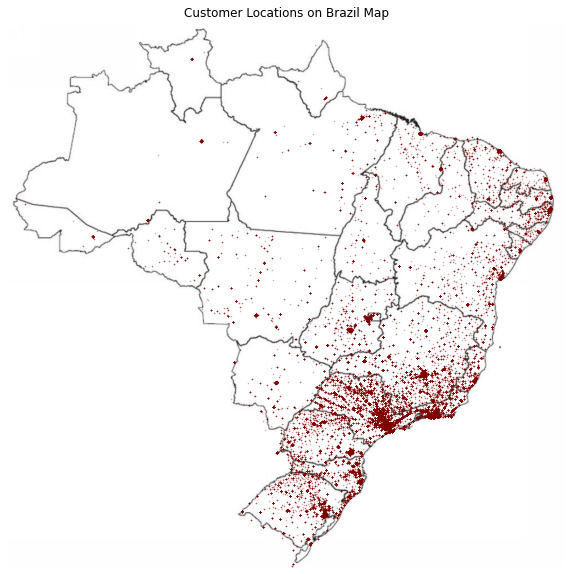

In [80]:
def plot_map(data):

    # Validate data
    if 'geolocation_lng' not in data.columns or 'geolocation_lat' not in data.columns:
        raise ValueError("Data must contain 'geolocation_lng' and 'geolocation_lat' columns")

    # Download and read Brazil map image
    try:
        response = urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg')
        brazil_image = plt.imread(response, format='jpg')  # Specify format to avoid potential errors
    except urllib.error.URLError as e:
        print(f"Error downloading map image: {e}")
        return

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(data['geolocation_lng'], data['geolocation_lat'], alpha=0.3, s=0.3, c='maroon', zorder=2)  # Scatter points on top of map
    ax.axis('off')

    extent = [-73.98283055, -33.8, -33.75116944, 5.4]  # Adjust extent as needed to match image dimensions
    ax.imshow(brazil_image, extent=extent, zorder=1)  # Place map image behind scatter points

    plt.title('Customer Locations on Brazil Map')
    plt.show()

plot_map(customer_location)

## Conclusion



**Pertanyaan 1. What are the top 10 product categories with the highest and lowest total sales?**
- The 10 best-selling product categories have sales above 4000 with the highest being the bed_bath_table category with 11115 sales. Meanwhile, the lowest sales were in the security_and_services category with only 2 sales In the highest revenue category number 1 is the health_beauty product category and bed_bath_table is in third place. Meanwhile, the item with the lowest revenue is the fashio_female_clothing category

**Pertanyaan 2. What are the total orders per month for the years 2017 and 2018?**
- The highest total orders in 2017 tended to increase and November was the highest peak. In 2018 the trend was stable and experienced a slight decline

**Pertanyaan 3. How many customers and sellers are there by city?**
- The city with the highest customers and sellers is both held by the city of Sao Paulo, which is quite far from other cities Followed by Rio de Janeiro with the second highest customer city and Curitiba, the second highest seller city

**Pertanyaan 4. What are the most frequent review comment titles?**
- The words with the highest frequency of appearance in reviews are recommend, produto and bomb. Recomendo is also the word with the most reviews with a review score = 5
And the product often appears in reviews, score = 1

**Pertanyaan 5. How are customers categorized by geographic location?**
- Based on the generated graph, there's a higher concentration of customers in the southeast and southern regions. Furthermore, there's a tendency for more customers to be located in capital cities such as São Paulo, Rio de Janeiro, Porto Alegre, and others


